In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from numpy import loadtxt
from pandas import read_csv
from xgboost import XGBClassifier
import lightgbm as lgb

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
df_1 = pd.get_dummies(df, columns=["Undergrad", 'Marital.Status', 'Urban'], drop_first=True)
df_1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
df_1.shape

(600, 7)

In [7]:
df_1["Fraud"] = np.where(df_1['Taxable.Income']<=30000, 0, 1)
df_1 = df_1.drop(columns=["Taxable.Income"], axis = 1)
df_1.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [8]:
x = df_1.iloc[:,1:6]
y = df_1.iloc[:,6]

In [9]:
y.sum()

476

In [10]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [11]:
x_train.shape, x_test.shape ,y_train.shape ,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

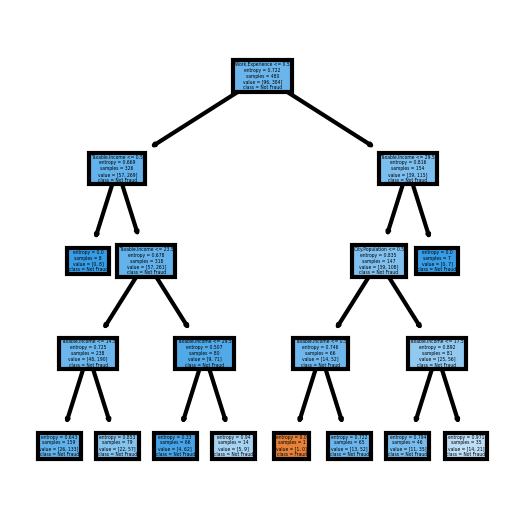

In [14]:
fn=['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Fraud', 'Not Fraud']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
preds = model.predict(x_test) # predicting on test data set 

In [16]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.76      0.99      0.86        92

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



In [17]:
results = cross_val_score(model, x, y, cv=5)
results

array([0.8       , 0.78333333, 0.79166667, 0.79166667, 0.79166667])

###### Gini criteria

In [18]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [19]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
pred=model.predict(x_test)

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.76      0.99      0.86        92

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



## Random Forest

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(n_estimators=100, max_features=3)
result1 = cross_val_score(model, x, y, cv=10)
print(result1.mean())

0.6983333333333333


In [24]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [25]:
preds = model.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.21      0.12      0.15        26
           1       0.78      0.88      0.83        94

    accuracy                           0.72       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.66      0.72      0.68       120



In [26]:
params_grid ={"n_estimators" : [200,400,500,800],
                "max_depth" : [5,7,9],
               "min_samples_leaf" : range(2,10),
               "min_samples_split" : [12,15,18],
               "max_leaf_nodes" : range(6,15) }

dt_estimator = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9],
                                        'max_leaf_nodes': range(6, 15),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [12, 15, 18],
                                        'n_estimators': [200, 400, 500, 800]},
                   random_state=0)

In [27]:
dt_estimator.best_params_

{'n_estimators': 400,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 14,
 'max_depth': 7}

In [28]:
pred1 = dt_estimator.predict(x_test)

In [29]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bagging

In [8]:
array = df_1.values
X = array[:,0:6]
Y = array[:,6]

In [31]:
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)

results = cross_val_score(model, X, Y, cv=5)
print(results.mean())

/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

0.7166666666666666


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [33]:
bg_clf = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
bg_clf.fit(X_train, y_train)

/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [34]:
y_pred_test = bg_clf.predict(X_test)

In [35]:
bg_clf.score(X_test, y_test)

0.7

In [36]:
tree_train_pred = pd.DataFrame( { 'actual':  y_test,
                            'pred': y_pred_test} )
tree_train_pred

,actual,pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
115,1,1
116,1,1
117,1,1
118,0,1


## ADABoost

In [37]:
model = AdaBoostClassifier(n_estimators=100, random_state=7)

In [38]:
results = cross_val_score(model, X, Y, cv=10)

In [39]:
print(results.mean())

0.7666666666666667


## XGBoost

In [40]:
%matplotlib inline
plt.rcParams['figure.figsize']=25,12
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 2500x1200 with 0 Axes>

In [41]:
col_names = df_1.columns

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [43]:
model = XGBClassifier(n_estimators=100,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9253731343283582

In [45]:
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7323232323232324

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
params={ 'n_estimators' : [200,250,400,450,500,600],
        'learning_rate' : [0.0001,0.001,0.01,0.1],
         'max_depth': range(3,14), 
         'colsample_bytree': [0.4,0.5,0.6,0.8]}

xgb_estimator = RandomizedSearchCV(XGBClassifier(), param_distributions=params, cv=5, random_state=0, n_jobs=-1)

xgb_estimator.fit(X_train, y_train)

y_pred1 = xgb_estimator.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("test accuracy : ", accuracy1)

y_pred2 = xgb_estimator.predict(X_train)
accuracy2 = accuracy_score(y_train, y_pred2)
print("train accuracy : ", accuracy2)

test accuracy :  0.803030303030303
train accuracy :  0.7885572139303483


## LGBM

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [10]:
d_train = lgb.Dataset(x_train, label=y_train)

In [11]:
params = {}
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [12]:
clf = lgb.train(params, d_train, 1400)

[LightGBM] [Info] Number of positive: 363, number of negative: 87
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806667 -> initscore=1.428495
[LightGBM] [Info] Start training from score 1.428495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
print(classification_report(y_test,predictions))